In [1]:
import h5py
import sys
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import math
import pandas as pd
import os
from scipy.interpolate import make_smoothing_spline, make_splrep, interp1d, BSpline

In [2]:
import importlib
import tools
importlib.reload(tools)

from tools import bin_data  

training_data = np.load('/sdf/data/neutrino/summer25/seohyeon/edep_estimators/muon10k_0-1gev_estimators_truth_training.npz')
testing_data = np.load('/sdf/data/neutrino/summer25/seohyeon/edep_estimators/muon10k_0-1gev_estimators_truth_testing.npz')

tr_energies = training_data['energies']
tr_naive = training_data['ranges']
tr_detailed = training_data['path_lengths']
tr_edeps = training_data['deposited_Es']
tr_evs = training_data['evs']

te_energies = testing_data['energies']
te_naive = testing_data['ranges']
te_detailed = testing_data['path_lengths']
te_edeps = testing_data['deposited_Es']
te_evs = testing_data['evs']

total_evs='20k'
energies = np.append(tr_energies, te_energies)

In [4]:
splines = np.load('muon10k_0-1gev_efxns_truth.npz')

naive_spl = BSpline(splines['naive_t'], splines['naive_c'], splines['naive_k'])
detailed_spl = BSpline(splines['detailed_t'], splines['detailed_c'], splines['detailed_k'])
edep_spl = BSpline(splines['edep_t'], splines['edep_c'], splines['edep_k'])


In [62]:
import importlib
import tools
importlib.reload(tools)

from tools import bin_data  

# naive-----------
tr_energies = training_data['energies']
tr_naive = training_data['ranges']

te_energies = testing_data['energies']
te_naive = testing_data['ranges']
energies = np.append(tr_energies, te_energies)

naive_res = naive_spl(tr_naive) - tr_energies
naive_rres = naive_res / tr_energies

testing_naive_res = naive_spl(te_naive) - te_energies
testing_naive_rres = testing_naive_res / te_energies


outlier = 19956

naive_rres = np.append(naive_rres, testing_naive_rres)
#remove outlier
naive_rres = np.delete(naive_rres, outlier)
energies = np.delete(energies, outlier)

naive_rres_x, naive_rres_y, naive_rres_error, naive_rres_rrms = bin_data(energies, naive_rres, 40)


n_bins=40
bins = np.linspace(min(energies), math.ceil(max(energies)), n_bins + 1)


bin_labels = range(n_bins)
naive_data_sep = dict.fromkeys(bin_labels, 0)

for i, bin_edge in enumerate(bins): 
    if i==0:
        continue
    else:
        mask = (energies >= bins[i-1]) & (energies < bins[i])
        naive_data_sep[i-1] = naive_rres[mask]

naive_stdevs = []
for key in naive_data_sep:
    bin_data = naive_data_sep[key]
    
    min_energy = round(bins[key], 1)
    max_energy = round(bins[key+1], 1)
    
    avg = np.mean(bin_data)
    stdev = np.std(bin_data)
    naive_stdevs.append(stdev)

    # print('-----')
    # print(min_energy)
    # print(stdev)

    # fig, ax = plt.subplots(figsize=(8, 5))
    # ax.hist(naive_data_sep[key], bins=25)
    # fig.subplots_adjust(right=0.8)
    # plt.title(f'naive length relative residual distribution, {min_energy:.1f} - {max_energy:.1f} MeV')
    # plt.xlabel(r'$(T_n - T_\mu) / T_\mu$')
    # plt.ylabel('counts')
    # fig.text(0.82, 0.5, f'average: {avg:.5f} \n stdev: {stdev:.5f}', ha="left", va="center",
    #         bbox=dict(facecolor="white", alpha=0.7, edgecolor="black") )
    # plt.savefig(f'accuracy_plots/naive/bin{key}.png')
    # plt.close()

    
    

In [63]:
import importlib
import tools
importlib.reload(tools)

from tools import bin_data  

# detailed-----------
tr_detailed = training_data['path_lengths']
te_detailed = testing_data['path_lengths']


detailed_res = detailed_spl(tr_detailed) - tr_energies
detailed_rres = detailed_res / tr_energies

testing_detailed_res = detailed_spl(te_detailed) - te_energies
testing_detailed_rres = testing_detailed_res / te_energies


detailed_rres = np.append(detailed_rres, testing_detailed_rres)
detailed_rres = np.delete(detailed_rres, outlier)


detailed_rres_x, detailed_rres_y, detailed_rres_error, detailed_rres_rrms = bin_data(energies, detailed_rres, 40)

n_bins=40
bins = np.linspace(min(energies), math.ceil(max(energies)), n_bins + 1)


bin_labels = range(n_bins)
detailed_data_sep = dict.fromkeys(bin_labels, 0)

for i, bin_edge in enumerate(bins): 
    if i==0:
        continue
    else:
        mask = (energies >= bins[i-1]) & (energies < bins[i])
        detailed_data_sep[i-1] = detailed_rres[mask]

detailed_stdevs = []
for key in detailed_data_sep:
    bin_data = detailed_data_sep[key]
    
    min_energy = round(bins[key], 1)
    max_energy = round(bins[key+1], 1)
    
    avg = np.mean(bin_data)
    stdev = np.std(bin_data)
    detailed_stdevs.append(stdev)

    # print('-----')
    # print(min_energy)
    # print(stdev)
    
    # fig, ax = plt.subplots(figsize=(8, 5))
    # ax.hist(detailed_data_sep[key], bins=25)
    # fig.subplots_adjust(right=0.8)
    # plt.title(f'detailed length relative residual distribution, {min_energy:.1f} - {max_energy:.1f} MeV')
    # plt.xlabel(r'$(T_d - T_\mu) / T_\mu$')
    # plt.ylabel('counts')
    # fig.text(0.82, 0.5, f'average: {avg:.5f} \n stdev: {stdev:.5f}', ha="left", va="center",
    #         bbox=dict(facecolor="white", alpha=0.7, edgecolor="black") )
    # plt.savefig(f'accuracy_plots/detailed/bin{key}.png')
    # plt.close()


print('in each plot, there is a total of 500 events')

in each plot, there is a total of 500 events


In [64]:
import importlib
import tools
importlib.reload(tools)

from tools import bin_data  

# edep-----------
tr_energies = training_data['energies']
tr_edep = training_data['deposited_Es']

te_energies = testing_data['energies']
te_edep = testing_data['deposited_Es']
energies = np.append(tr_energies, te_energies)

edep_res = edep_spl(tr_edep) - tr_energies
edep_rres = edep_res / tr_energies

testing_edep_res = edep_spl(te_edep) - te_energies
testing_edep_rres = testing_edep_res / te_energies


outlier = 19956

edep_rres = np.append(edep_rres, testing_edep_rres)
#remove outlier
edep_rres = np.delete(edep_rres, outlier)
energies = np.delete(energies, outlier)

edep_rres_x, edep_rres_y, edep_rres_error, edep_rres_rrms = bin_data(tr_energies, edep_rres, 40)


n_bins=40
bins = np.linspace(min(energies), math.ceil(max(energies)), n_bins + 1)


bin_labels = range(n_bins)
edep_data_sep = dict.fromkeys(bin_labels, 0)

for i, bin_edge in enumerate(bins): 
    if i==0:
        continue
    else:
        mask = (energies >= bins[i-1]) & (energies < bins[i])
        edep_data_sep[i-1] = edep_rres[mask]

edep_stdevs=[]
for key in edep_data_sep:
    bin_data = edep_data_sep[key]
    
    min_energy = round(bins[key], 1)
    max_energy = round(bins[key+1], 1)
    
    avg = np.mean(bin_data)
    stdev = np.std(bin_data)
    edep_stdevs.append(stdev)

#     print('-----')
#     print(min_energy)
#     print(stdev)
    
#     fig, ax = plt.subplots(figsize=(8, 5))
#     ax.hist(edep_data_sep[key], bins=25)
#     fig.subplots_adjust(right=0.8)
#     plt.title(f'energy deposited relative residual distribution, {min_energy:.1f} - {max_energy:.1f} MeV')
#     plt.xlabel(r'$(T_{edep} - T_\mu) / T_\mu$')
#     plt.ylabel('counts')
#     fig.text(0.82, 0.5, f'average: {avg:.5f} \n stdev: {stdev:.5f}', ha="left", va="center",
#             bbox=dict(facecolor="white", alpha=0.7, edgecolor="black") )
#     plt.savefig(f'accuracy_plots/edep/bin{key}.png')
#     plt.close()


print('in each plot, there is a total of 500 events')


in each plot, there is a total of 500 events


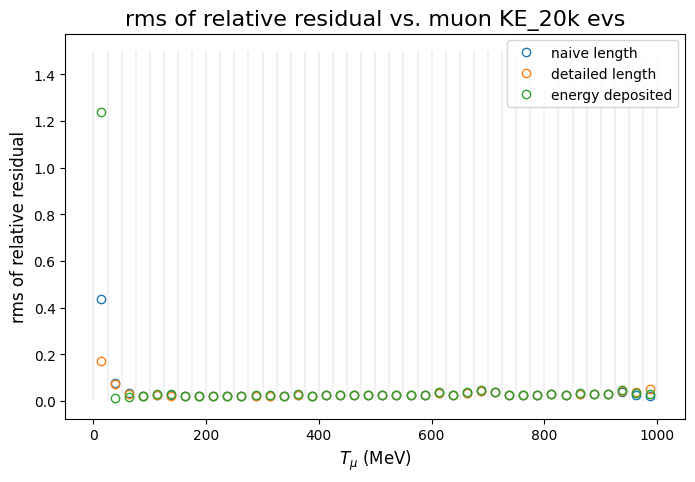

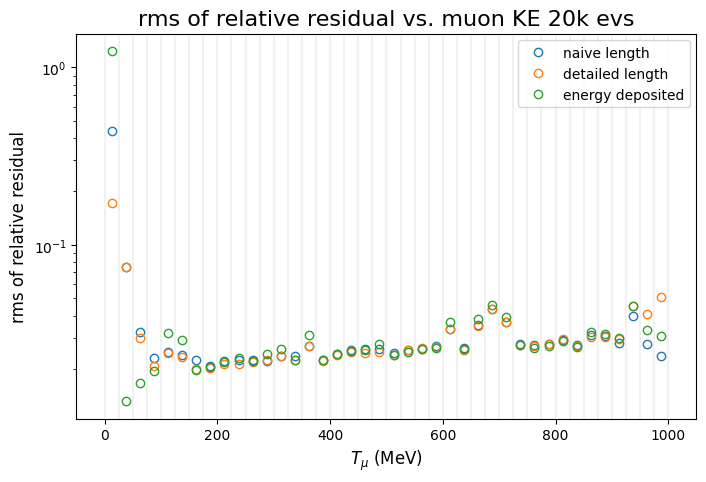

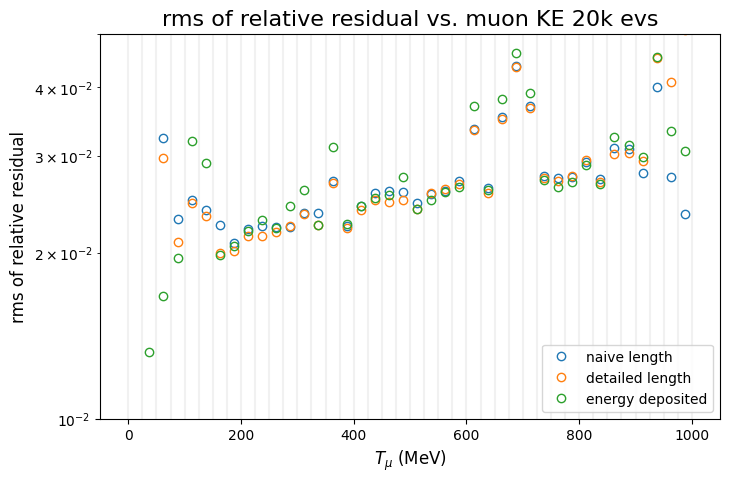

In [65]:
# comparisons ---------------
vlines = np.linspace(min(energies), max(energies), 41)

plt.figure(figsize=(8, 5))
plt.plot(naive_rres_x, naive_stdevs, 'o', label="naive length", markerfacecolor='none')
plt.plot(detailed_rres_x, detailed_stdevs, 'o', label='detailed length', markerfacecolor='none')
plt.plot(edep_rres_x, edep_stdevs, 'o', label='energy deposited', markerfacecolor='none')
plt.legend()
plt.vlines(x=vlines, ymin=0, ymax=1.5, color='lightgray', alpha=0.3)
plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.ylabel('rms of relative residual', fontsize=12)
plt.title(f'rms of relative residual vs. muon KE_{total_evs} evs', fontsize=16)
plt.savefig(f'accuracy_plots/rres_rms_comparison_{total_evs}evs.png')

plt.figure(figsize=(8, 5))
plt.yscale('log')
plt.plot(naive_rres_x, naive_stdevs, 'o', label="naive length", markerfacecolor='none')
plt.plot(detailed_rres_x, detailed_stdevs, 'o', label='detailed length', markerfacecolor='none')
plt.plot(edep_rres_x, edep_stdevs, 'o', label='energy deposited', markerfacecolor='none')
plt.vlines(x=vlines, ymin=0, ymax=1.5, color='lightgray', alpha=0.3)
plt.legend()
plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.ylabel('rms of relative residual', fontsize=12)
plt.title(f'rms of relative residual vs. muon KE {total_evs} evs', fontsize=16)
plt.savefig(f'accuracy_plots/rres_rms_comparison_log_{total_evs}evs.png')

plt.figure(figsize=(8, 5))
plt.ylim(0.01, 0.05)
plt.yscale('log')
plt.plot(naive_rres_x, naive_stdevs, 'o', label="naive length", markerfacecolor='none')
plt.plot(detailed_rres_x, detailed_stdevs, 'o', label='detailed length', markerfacecolor='none')
plt.plot(edep_rres_x, edep_stdevs, 'o', label='energy deposited', markerfacecolor='none')
plt.vlines(x=vlines, ymin=0, ymax=1.5, color='lightgray', alpha=0.3)
plt.legend()
plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.ylabel('rms of relative residual', fontsize=12)
plt.title(f'rms of relative residual vs. muon KE {total_evs} evs', fontsize=16)
plt.savefig(f'accuracy_plots/rres_rms_comparison_logzoom_{total_evs}evs.png')

# overlay #

## log ##

0.026993409441963316
0.033572694116116845
0.02616784985671906
0.035269456439235104
0.04368599222193632
0.03700262536289818


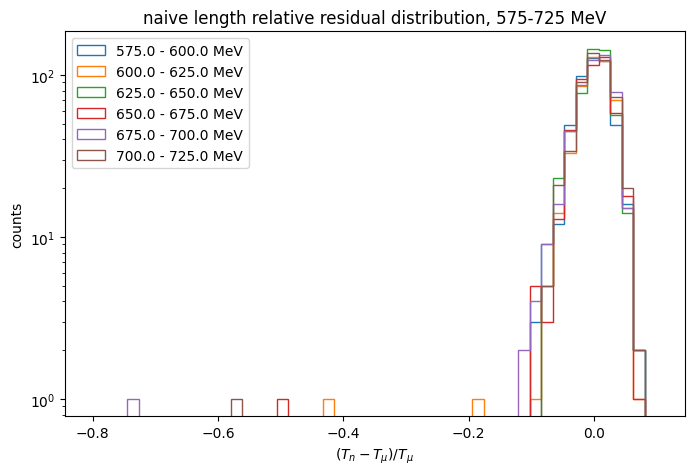

In [76]:
hist_bins=np.linspace(-0.4, 0.1, 30)


# fig, ax = plt.subplots(figsize=(8, 5))
# plt.yscale('log')
# for n in range(4, 8):
#     bin_data = naive_data_sep[n]

#     min_energy = round(bins[n], 1)
#     max_energy = round(bins[n+1], 1)

#     avg = np.mean(bin_data)
#     stdev = np.std(bin_data)

#     ax.hist(bin_data, bins=hist_bins, label=f'{min_energy} - {max_energy} MeV', histtype='step')
#     plt.title(f'naive length relative residual distribution, 100-200 MeV')
#     plt.xlabel(r'$(T_n - T_\mu) / T_\mu$')
#     plt.ylabel('counts')
# plt.legend()
# plt.savefig('accuracy_plots/log_naive_100-200mev_overlay.png')


# fig, ax = plt.subplots(figsize=(8, 5))
# plt.yscale('log')
# for n in range(12, 16):
#     bin_data = naive_data_sep[n]

#     min_energy = round(bins[n], 1)
#     max_energy = round(bins[n+1], 1)

#     avg = np.mean(bin_data)
#     stdev = np.std(bin_data)

#     ax.hist(bin_data, bins=hist_bins, label=f'{min_energy} - {max_energy} MeV', histtype='step')
#     plt.title(f'naive length relative residual distribution, 300-400 MeV')
#     plt.xlabel(r'$(T_n - T_\mu) / T_\mu$')
#     plt.ylabel('counts')
# plt.legend()
# plt.savefig('accuracy_plots/log_naive_300-400mev_overlay.png')


fig, ax = plt.subplots(figsize=(8, 5))
plt.yscale('log')
for n in range(23, 29):
    bin_data = naive_data_sep[n]

    min_energy = round(bins[n], 1)
    max_energy = round(bins[n+1], 1)

    avg = np.mean(bin_data)
    stdev = np.std(bin_data)
    print(stdev)

    ax.hist(bin_data, bins=np.linspace(-0.8, 0.1), label=f'{min_energy} - {max_energy} MeV', histtype='step')
    plt.title(f'naive length relative residual distribution, 575-725 MeV')
    plt.xlabel(r'$(T_n - T_\mu) / T_\mu$')
    plt.ylabel('counts')
plt.legend()
plt.savefig('accuracy_plots/log_naive_575-725mev_overlay.png')

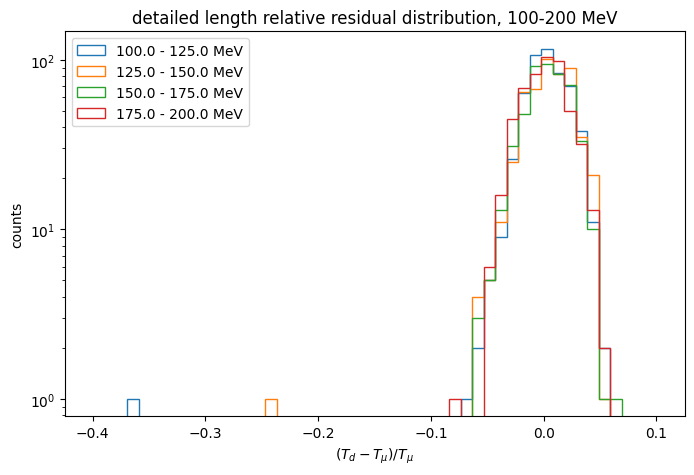

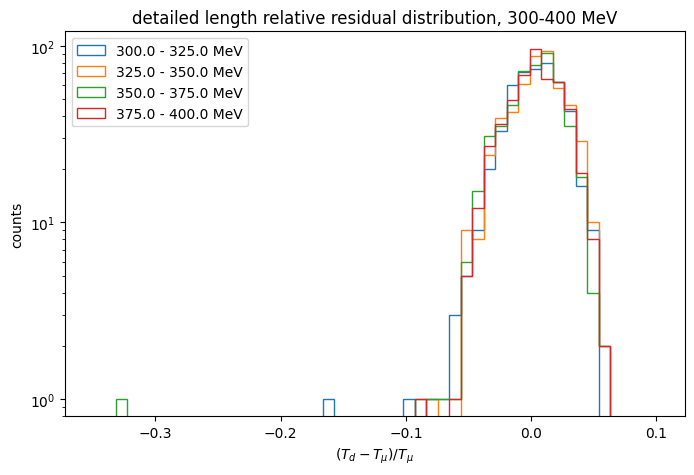

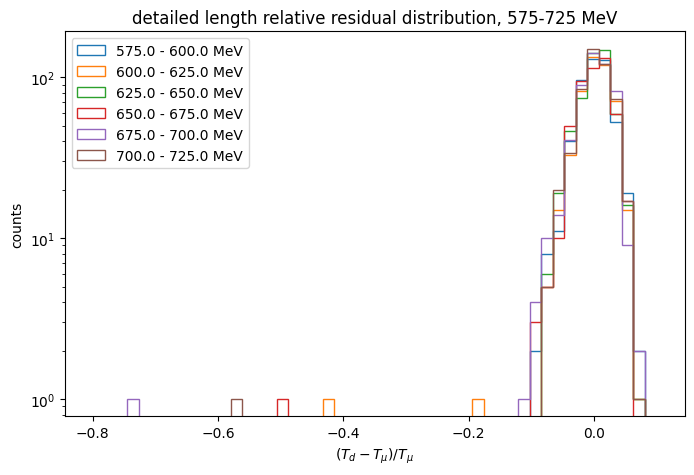

In [70]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.yscale('log')
for n in range(4, 8):
    bin_data = detailed_data_sep[n]

    min_energy = round(bins[n], 1)
    max_energy = round(bins[n+1], 1)

    avg = np.mean(bin_data)
    stded = np.std(bin_data)

    ax.hist(bin_data, bins=np.linspace(-0.4, 0.1), label=f'{min_energy} - {max_energy} MeV', histtype='step')
    plt.title(f'detailed length relative residual distribution, 100-200 MeV')
    plt.xlabel(r'$(T_d - T_\mu) / T_\mu$')
    plt.ylabel('counts')
plt.legend()
plt.savefig('accuracy_plots/log_detailed_100-200mev_overlay.png')


fig, ax = plt.subplots(figsize=(8, 5))
plt.yscale('log')
for n in range(12, 16):
    bin_data = detailed_data_sep[n]

    min_energy = round(bins[n], 1)
    max_energy = round(bins[n+1], 1)

    avg = np.mean(bin_data)
    stded = np.std(bin_data)

    ax.hist(bin_data, bins=np.linspace(-0.35, 0.1), label=f'{min_energy} - {max_energy} MeV', histtype='step')
    plt.title(f'detailed length relative residual distribution, 300-400 MeV')
    plt.xlabel(r'$(T_d - T_\mu) / T_\mu$')
    plt.ylabel('counts')
plt.legend()
plt.savefig('accuracy_plots/log_detailed_300-400mev_overlay.png')

fig, ax = plt.subplots(figsize=(8, 5))
plt.yscale('log')
for n in range(23, 29):
    bin_data = detailed_data_sep[n]

    min_energy = round(bins[n], 1)
    max_energy = round(bins[n+1], 1)

    avg = np.mean(bin_data)
    stded = np.std(bin_data)

    ax.hist(bin_data, bins=np.linspace(-0.8, 0.1), label=f'{min_energy} - {max_energy} MeV', histtype='step')
    plt.title(f'detailed length relative residual distribution, 575-725 MeV')
    plt.xlabel(r'$(T_d - T_\mu) / T_\mu$')
    plt.ylabel('counts')
plt.legend()
plt.savefig('accuracy_plots/log_detailed_575-725mev_overlay.png')

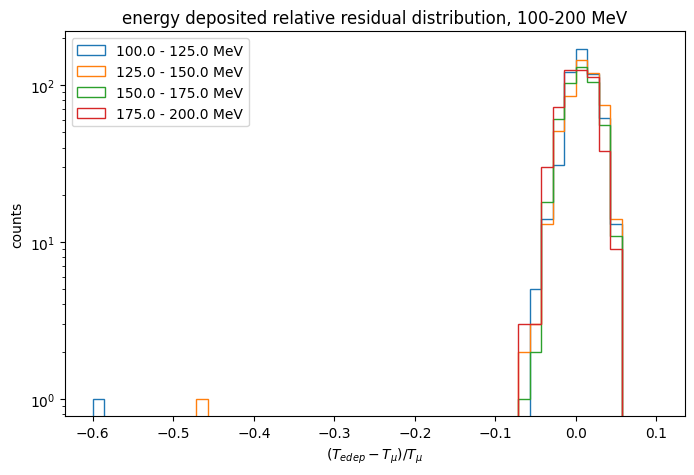

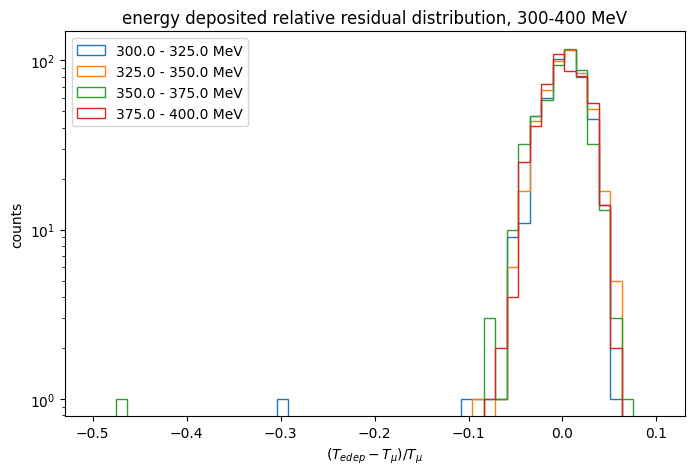

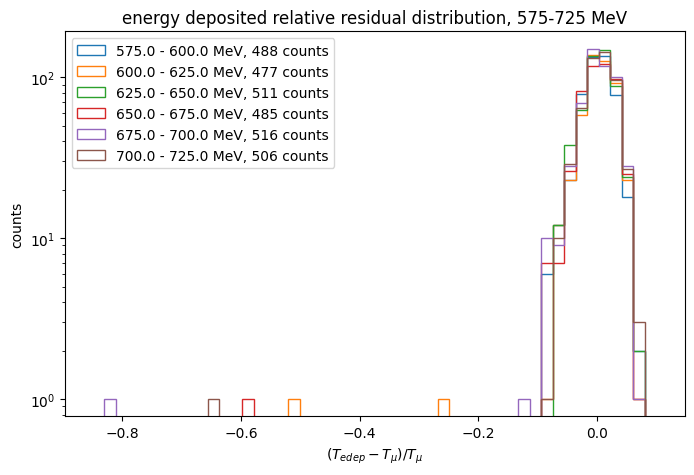

In [52]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.yscale('log')
for n in range(4, 8):
    bin_data = edep_data_sep[n]

    min_energy = round(bins[n], 1)
    max_energy = round(bins[n+1], 1)

    avg = np.mean(bin_data)
    stded = np.std(bin_data)

    ax.hist(bin_data, bins=np.linspace(-0.6, 0.1), label=f'{min_energy} - {max_energy} MeV', histtype='step')
    plt.title(f'energy deposited relative residual distribution, 100-200 MeV')
    plt.xlabel(r'$(T_{edep} - T_\mu) / T_\mu$')
    plt.ylabel('counts')
plt.legend()
plt.savefig('accuracy_plots/log_edep_100-200mev_overlay.png')


fig, ax = plt.subplots(figsize=(8, 5))
plt.yscale('log')
for n in range(12, 16):
    bin_data = edep_data_sep[n]

    min_energy = round(bins[n], 1)
    max_energy = round(bins[n+1], 1)

    avg = np.mean(bin_data)
    stded = np.std(bin_data)

    ax.hist(bin_data, bins=np.linspace(-0.5, 0.1), label=f'{min_energy} - {max_energy} MeV', histtype='step')
    plt.title(f'energy deposited relative residual distribution, 300-400 MeV')
    plt.xlabel(r'$(T_{edep} - T_\mu) / T_\mu$')
    plt.ylabel('counts')
plt.legend()
plt.savefig('accuracy_plots/log_edep_300-400mev_overlay.png')

fig, ax = plt.subplots(figsize=(8, 5))
plt.yscale('log')
for n in range(23, 29):
    bin_data = edep_data_sep[n]

    min_energy = round(bins[n], 1)
    max_energy = round(bins[n+1], 1)

    avg = np.mean(bin_data)
    stded = np.std(bin_data)
    counts = len(bin_data)

    ax.hist(bin_data, bins=np.linspace(-0.85, 0.1), label=f'{min_energy} - {max_energy} MeV, {counts} counts', histtype='step')
    plt.title(f'energy deposited relative residual distribution, 575-725 MeV')
    plt.xlabel(r'$(T_{edep} - T_\mu) / T_\mu$')
    plt.ylabel('counts')
plt.legend()
plt.savefig('accuracy_plots/log_edep_575-725mev_overlay.png')

## linear ##

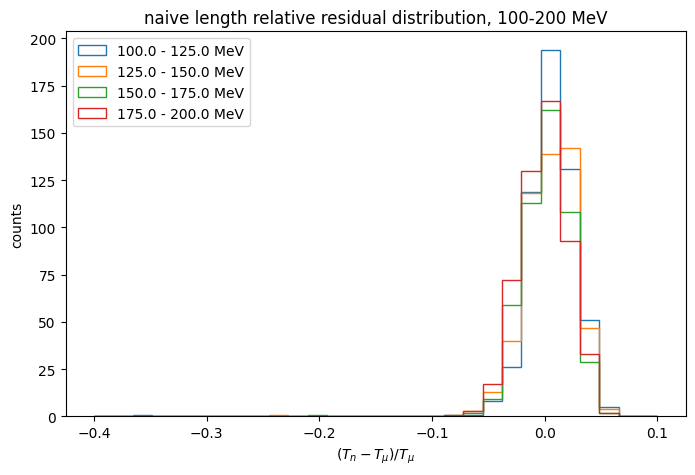

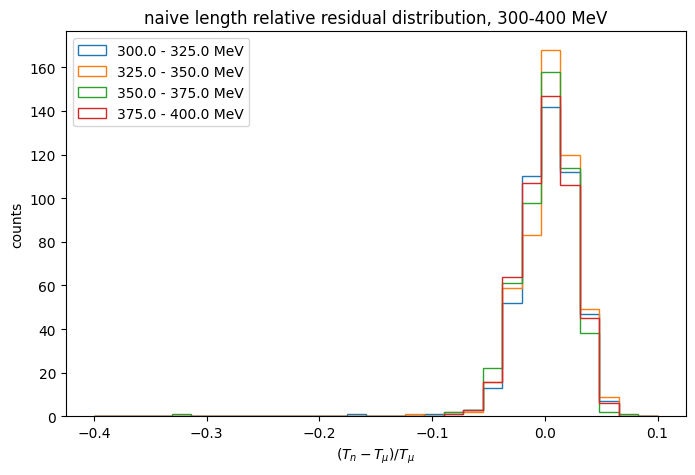

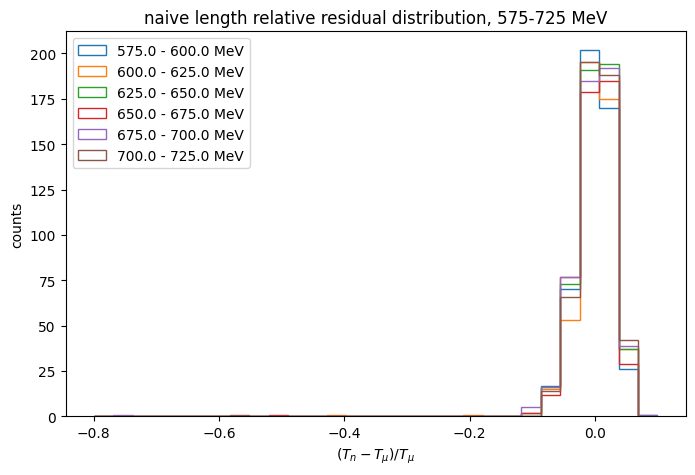

In [73]:
hist_bins=np.linspace(-0.4, 0.1, 30)

fig, ax = plt.subplots(figsize=(8, 5))
for n in range(4, 8):
    bin_data = naive_data_sep[n]

    min_energy = round(bins[n], 1)
    max_energy = round(bins[n+1], 1)

    avg = np.mean(bin_data)
    stded = np.std(bin_data)

    ax.hist(bin_data, bins=hist_bins, label=f'{min_energy} - {max_energy} MeV', histtype='step')
    plt.title(f'naive length relative residual distribution, 100-200 MeV')
    plt.xlabel(r'$(T_n - T_\mu) / T_\mu$')
    plt.ylabel('counts')
plt.legend()
plt.savefig('accuracy_plots/naive_100-200mev_overlay.png')


fig, ax = plt.subplots(figsize=(8, 5))
for n in range(12, 16):
    bin_data = naive_data_sep[n]

    min_energy = round(bins[n], 1)
    max_energy = round(bins[n+1], 1)

    avg = np.mean(bin_data)
    stded = np.std(bin_data)

    ax.hist(bin_data, bins=hist_bins, label=f'{min_energy} - {max_energy} MeV', histtype='step')
    plt.title(f'naive length relative residual distribution, 300-400 MeV')
    plt.xlabel(r'$(T_n - T_\mu) / T_\mu$')
    plt.ylabel('counts')
plt.legend()
plt.savefig('accuracy_plots/naive_300-400mev_overlay.png')

fig, ax = plt.subplots(figsize=(8, 5))
for n in range(23, 29):
    bin_data = naive_data_sep[n]

    min_energy = round(bins[n], 1)
    max_energy = round(bins[n+1], 1)

    avg = np.mean(bin_data)
    stded = np.std(bin_data)

    ax.hist(bin_data, bins=np.linspace(-0.8, 0.1, 30), label=f'{min_energy} - {max_energy} MeV', histtype='step')
    plt.title(f'naive length relative residual distribution, 575-725 MeV')
    plt.xlabel(r'$(T_n - T_\mu) / T_\mu$')
    plt.ylabel('counts')
plt.legend()
plt.savefig('accuracy_plots/naive_575-725mev_overlay.png')

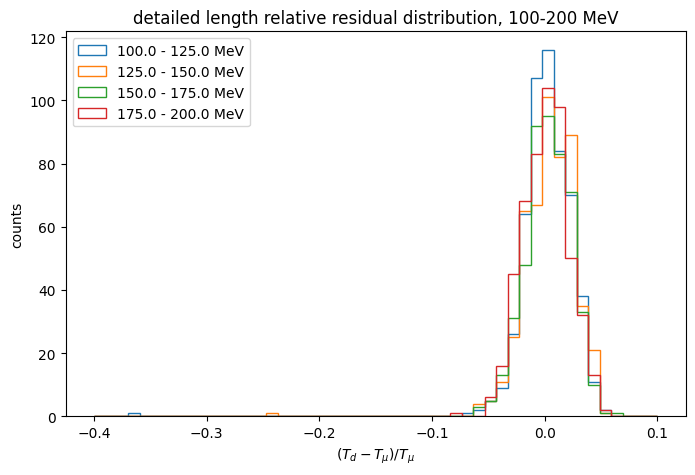

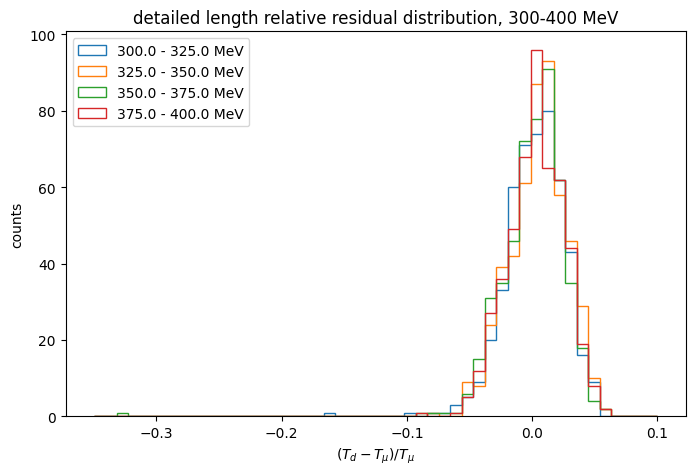

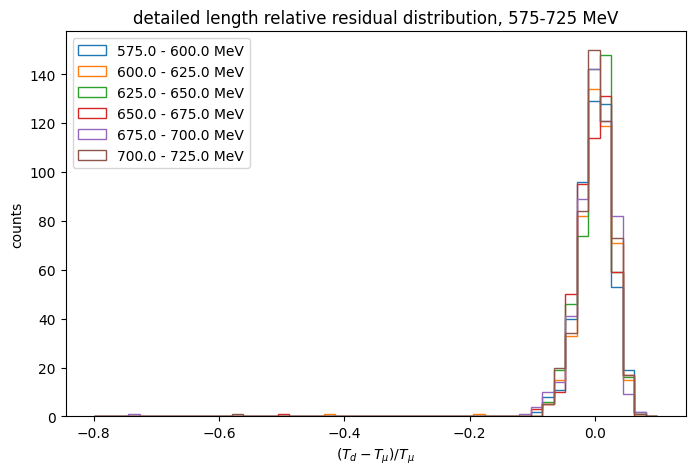

In [56]:
fig, ax = plt.subplots(figsize=(8, 5))
for n in range(4, 8):
    bin_data = detailed_data_sep[n]

    min_energy = round(bins[n], 1)
    max_energy = round(bins[n+1], 1)

    avg = np.mean(bin_data)
    stded = np.std(bin_data)

    ax.hist(bin_data, bins=np.linspace(-0.4, 0.1), label=f'{min_energy} - {max_energy} MeV', histtype='step')
    plt.title(f'detailed length relative residual distribution, 100-200 MeV')
    plt.xlabel(r'$(T_d - T_\mu) / T_\mu$')
    plt.ylabel('counts')
plt.legend()
plt.savefig('accuracy_plots/detailed_100-200mev_overlay.png')


fig, ax = plt.subplots(figsize=(8, 5))
for n in range(12, 16):
    bin_data = detailed_data_sep[n]

    min_energy = round(bins[n], 1)
    max_energy = round(bins[n+1], 1)

    avg = np.mean(bin_data)
    stded = np.std(bin_data)

    ax.hist(bin_data, bins=np.linspace(-0.35, 0.1), label=f'{min_energy} - {max_energy} MeV', histtype='step')
    plt.title(f'detailed length relative residual distribution, 300-400 MeV')
    plt.xlabel(r'$(T_d - T_\mu) / T_\mu$')
    plt.ylabel('counts')
plt.legend()
plt.savefig('accuracy_plots/detailed_300-400mev_overlay.png')

fig, ax = plt.subplots(figsize=(8, 5))
for n in range(23, 29):
    bin_data = detailed_data_sep[n]

    min_energy = round(bins[n], 1)
    max_energy = round(bins[n+1], 1)

    avg = np.mean(bin_data)
    stded = np.std(bin_data)

    ax.hist(bin_data, bins=np.linspace(-0.8, 0.1), label=f'{min_energy} - {max_energy} MeV', histtype='step')
    plt.title(f'detailed length relative residual distribution, 575-725 MeV')
    plt.xlabel(r'$(T_d - T_\mu) / T_\mu$')
    plt.ylabel('counts')
plt.legend()
plt.savefig('accuracy_plots/detailed_575-725mev_overlay.png')

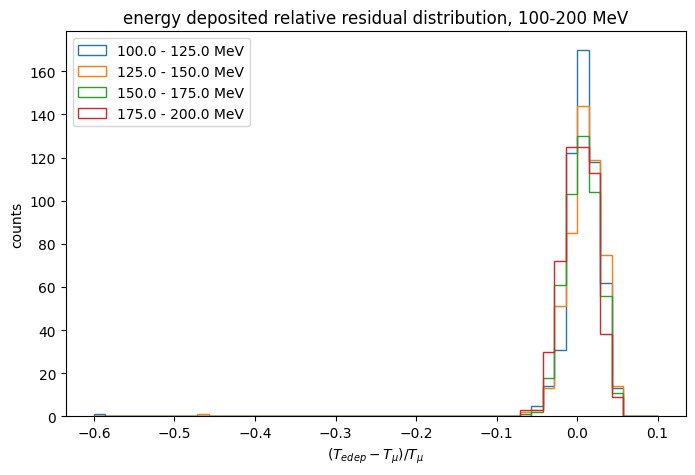

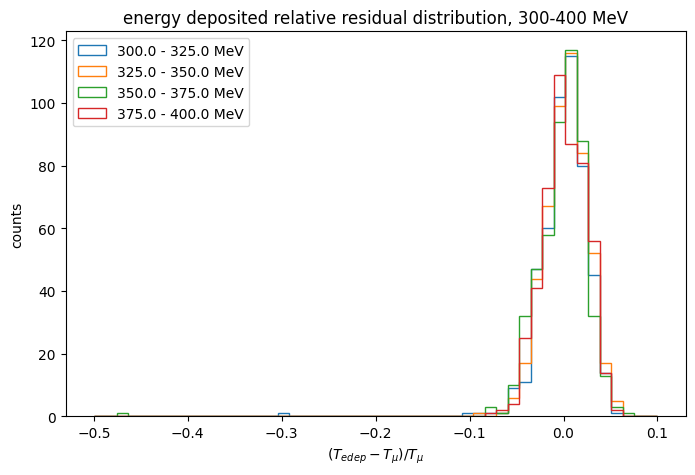

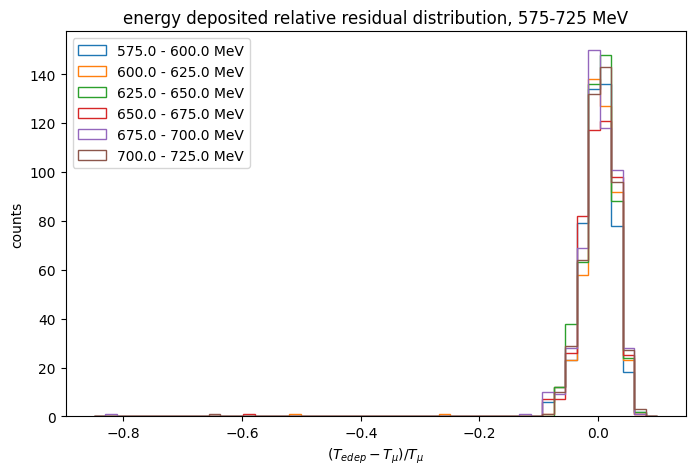

In [67]:
fig, ax = plt.subplots(figsize=(8, 5))
for n in range(4, 8):
    bin_data = edep_data_sep[n]

    min_energy = round(bins[n], 1)
    max_energy = round(bins[n+1], 1)

    avg = np.mean(bin_data)
    stded = np.std(bin_data)

    ax.hist(bin_data, bins=np.linspace(-0.6, 0.1), label=f'{min_energy} - {max_energy} MeV', histtype='step')
    plt.title(f'energy deposited relative residual distribution, 100-200 MeV')
    plt.xlabel(r'$(T_{edep} - T_\mu) / T_\mu$')
    plt.ylabel('counts')
plt.legend()
plt.savefig('accuracy_plots/edep_100-200mev_overlay.png')


fig, ax = plt.subplots(figsize=(8, 5))
for n in range(12, 16):
    bin_data = edep_data_sep[n]

    min_energy = round(bins[n], 1)
    max_energy = round(bins[n+1], 1)

    avg = np.mean(bin_data)
    stded = np.std(bin_data)

    ax.hist(bin_data, bins=np.linspace(-0.5, 0.1), label=f'{min_energy} - {max_energy} MeV', histtype='step')
    plt.title(f'energy deposited relative residual distribution, 300-400 MeV')
    plt.xlabel(r'$(T_{edep} - T_\mu) / T_\mu$')
    plt.ylabel('counts')
plt.legend()
plt.savefig('accuracy_plots/edep_300-400mev_overlay.png')

fig, ax = plt.subplots(figsize=(8, 5))
for n in range(23, 29):
    bin_data = edep_data_sep[n]

    min_energy = round(bins[n], 1)
    max_energy = round(bins[n+1], 1)

    avg = np.mean(bin_data)
    stded = np.std(bin_data)
    counts = len(bin_data)

    ax.hist(bin_data, bins=np.linspace(-0.85, 0.1), label=f'{min_energy} - {max_energy} MeV', histtype='step')
    plt.title(f'energy deposited relative residual distribution, 575-725 MeV')
    plt.xlabel(r'$(T_{edep} - T_\mu) / T_\mu$')
    plt.ylabel('counts')
plt.legend()
plt.savefig('accuracy_plots/edep_575-725mev_overlay.png')